# OMOP Attribute Analysis per Manufacturer
## 1. Introduction



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


## 2. Data Loading
- Load datasets.m
- Verify schema and data integrity.


In [2]:
DATA_INPUT_PATH = "/home/paula/Documentos/pmorenofajardo87/NOCTUAMED/noctuamed_rafa/transmisiones_a_csv/transmisiones_anonimizadas_gem/estandarizados/omop_standardized_data.csv"

In [3]:
## Data Coverage

In [4]:
# Load the datasets
print("Loading datasets...")
try:
    # Load the standardized data
    omop_standardized = pd.read_csv(DATA_INPUT_PATH)
    
    # Load the OMOP field definitions
    omop_fields = pd.read_csv("OMOP_fields_merged.csv")
    
    print(f"Standardized data shape: {omop_standardized.shape}")
    print(f"OMOP fields shape: {omop_fields.shape}")
except Exception as e:
    print(f"Error loading datasets: {e}")


Loading datasets...
Standardized data shape: (30, 81)
OMOP fields shape: (81, 10)


In [5]:
# Get the column names from the standardized data
standardized_columns = omop_standardized.columns.tolist()
print(f"Number of columns in standardized data: {len(standardized_columns)}")

# Get the OMOP field names from the field definitions
omop_field_names = omop_fields['OMOP Field'].tolist()
print(f"Number of OMOP fields: {len(omop_field_names)}")

# Find columns in standardized data that are not in OMOP field definitions
not_in_omop = [col for col in standardized_columns if col not in omop_field_names]
print(f"Number of columns not in OMOP field definitions: {len(not_in_omop)}")
if len(not_in_omop) > 0:
    print("Columns not in OMOP field definitions:")
    for col in not_in_omop[:10]:  # Show first 10 to avoid overwhelming output
        print(f"- {col}")
    if len(not_in_omop) > 10:
        print(f"... and {len(not_in_omop) - 10} more")

# Find OMOP fields that are not in standardized data
not_in_standardized = [field for field in omop_field_names if field not in standardized_columns]
print(f"Number of OMOP fields not in standardized data: {len(not_in_standardized)}")
if len(not_in_standardized) > 0:
    print("OMOP fields not in standardized data:")
    for field in not_in_standardized[:10]:  # Show first 10
        print(f"- {field}")
    if len(not_in_standardized) > 10:
        print(f"... and {len(not_in_standardized) - 10} more")


Number of columns in standardized data: 81
Number of OMOP fields: 81
Number of columns not in OMOP field definitions: 4
Columns not in OMOP field definitions:
- source_file
- manufacturer_code
- patient_id_pid2
- patient_id_pid3
Number of OMOP fields not in standardized data: 3
OMOP fields not in standardized data:
- PT_DOB
- PT_GENDER
- PT_NAME


In [6]:
# Get unique manufacturer codes
manufacturer_codes = omop_standardized['manufacturer_code'].unique()
print(f"Number of unique manufacturer codes: {len(manufacturer_codes)}")
print("Manufacturer codes:")
for code in manufacturer_codes:
    print(f"- {code}")


Number of unique manufacturer codes: 5
Manufacturer codes:
- p1_abbott
- p2_biotronik
- p3_boston_scientific
- p4_medtronic
- p5_microport


## 3. Coverage Analysis
- Extract manufacturer codes.
- Compute coverage of OMOP fields per manufacturer.
- Summarize overall coverage statistics.

In [7]:
# Create a summary table of field coverage by manufacturer
print("\nCreating summary table of field coverage by manufacturer...")

# Initialize a dictionary to store coverage data
coverage_data = {}

# For each manufacturer, calculate the percentage of OMOP fields that have data
for manufacturer in manufacturer_codes:
    manufacturer_data = omop_standardized[omop_standardized['manufacturer_code'] == manufacturer]
    
    # Count non-empty fields that are in OMOP field definitions
    field_coverage = {}
    for field in omop_field_names:
        if field in manufacturer_data.columns:
            # Calculate percentage of non-null values
            if len(manufacturer_data) > 0:
                coverage_pct = manufacturer_data[field].notna().mean() * 100
            else:
                coverage_pct = 0
            field_coverage[field] = coverage_pct
        else:
            field_coverage[field] = 0
    
    coverage_data[manufacturer] = field_coverage

# Convert to DataFrame for easier analysis
coverage_df = pd.DataFrame(coverage_data)

# Calculate overall coverage for each field
coverage_df['overall'] = coverage_df.mean(axis=1)

# Sort by overall coverage
coverage_df = coverage_df.sort_values('overall', ascending=False)

# Display top fields with highest coverage
print("\nTop 20 OMOP fields with highest overall coverage:")
display(coverage_df.head(20))

# Display fields with no coverage
print("\nOMOP fields with no coverage across all manufacturers:")
no_coverage = coverage_df[coverage_df['overall'] == 0]
print(f"Number of fields with no coverage: {len(no_coverage)}")
if len(no_coverage) > 0:
    print(no_coverage.index.tolist()[:10])  # Show first 10
    if len(no_coverage) > 10:
        print(f"... and {len(no_coverage) - 10} more")



Creating summary table of field coverage by manufacturer...

Top 20 OMOP fields with highest overall coverage:


,p1_abbott,p2_biotronik,p3_boston_scientific,p4_medtronic,p5_microport,overall
MDC_IDC_DEV_MFG,100.0,100.0,100.000000,100.0,100.000000,100.000000
MDC_IDC_DEV_MODEL,100.0,100.0,100.000000,100.0,100.000000,100.000000
MDC_IDC_DEV_SERIAL,100.0,100.0,100.000000,100.0,100.000000,100.000000
MDC_IDC_DEV_TYPE,100.0,100.0,100.000000,100.0,100.000000,100.000000
MDC_IDC_SESS_DTM,100.0,100.0,100.000000,100.0,100.000000,100.000000
MDC_IDC_SET_BRADY_LOWRATE,100.0,100.0,66.666667,100.0,100.000000,93.333333
MDC_IDC_SET_BRADY_MODE,100.0,100.0,66.666667,100.0,100.000000,93.333333
MDC_IDC_SET_BRADY_MAX_SENSOR_RATE,100.0,75.0,66.666667,100.0,66.666667,81.666667
MDC_IDC_SET_LEADCHNL_RV_SENSING_POLARITY,100.0,100.0,0.000000,100.0,100.000000,80.000000
MDC_IDC_SET_LEADCHNL_RV_PACING_AMPLITUDE,100.0,100.0,0.000000,100.0,100.000000,80.000000



OMOP fields with no coverage across all manufacturers:
Number of fields with no coverage: 22
['MDC_IDC_STAT_TACHYTHERAPY_SHOCKS_ABORTED_RECENT', 'MDC_IDC_STAT_TACHYTHERAPY_SHOCKS_ABORTED_TOTAL', 'MDC_IDC_STAT_TACHYTHERAPY_SHOCKS_DELIVERED_RECENT', 'MDC_IDC_STAT_TACHYTHERAPY_ATP_DELIVERED_TOTAL', 'MDC_IDC_STAT_TACHYTHERAPY_SHOCKS_DELIVERED_TOTAL', 'MDC_IDC_STAT_TACHYTHERAPY_TOTAL_DTM_END', 'MDC_IDC_STAT_TACHYTHERAPY_TOTAL_DTM_START', 'PT_DOB', 'PT_GENDER', 'MDC_IDC_SET_LEADCHNL_LV_SENSING_POLARITY']
... and 12 more


Heatmap saved to 'omop_field_coverage_heatmap.png'


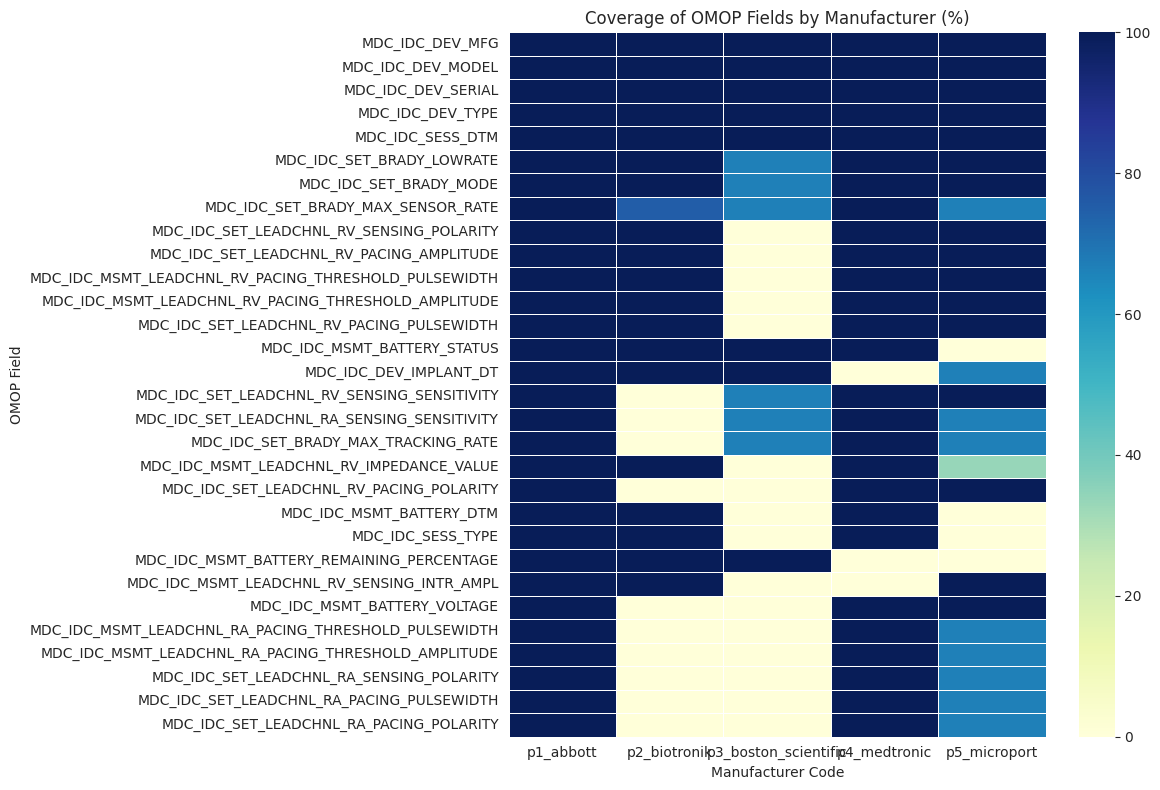

In [8]:
# Create a heatmap of field coverage by manufacturer
plt.figure(figsize=(12, 8))
# Select top 30 fields with highest overall coverage
top_fields = coverage_df.head(30).index
heatmap_data = coverage_df.loc[top_fields, manufacturer_codes]
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt=".1f", linewidths=.5)
plt.title('Coverage of OMOP Fields by Manufacturer (%)')
plt.ylabel('OMOP Field')
plt.xlabel('Manufacturer Code')
plt.tight_layout()
plt.savefig('omop_field_coverage_heatmap.png')
print("Heatmap saved to 'omop_field_coverage_heatmap.png'")


In [9]:
print("\nConclusion:")
print("This analysis examined the relationship between standardized data attributes and OMOP field definitions for each manufacturer.")
print(f"- Total number of OMOP fields: {len(omop_field_names)}")
print(f"- Number of manufacturers: {len(manufacturer_codes)}")

# Calculate average coverage across all manufacturers
avg_coverage = coverage_df['overall'].mean()
print(f"- Average field coverage across all manufacturers: {avg_coverage:.2f}%")

# Identify manufacturers with highest and lowest coverage
manufacturer_coverage = {}
for manufacturer in manufacturer_codes:
    manufacturer_coverage[manufacturer] = coverage_df[manufacturer].mean()

max_manufacturer = max(manufacturer_coverage, key=manufacturer_coverage.get)
min_manufacturer = min(manufacturer_coverage, key=manufacturer_coverage.get)

print(f"- Manufacturer with highest field coverage: {max_manufacturer} ({manufacturer_coverage[max_manufacturer]:.2f}%)")
print(f"- Manufacturer with lowest field coverage: {min_manufacturer} ({manufacturer_coverage[min_manufacturer]:.2f}%)")

# Recommendations
print("\nRecommendations:")
print("1. For fields with low coverage, consider standardizing data collection across manufacturers")
print("2. For manufacturers with low coverage, investigate if additional data can be extracted")
print("3. For fields not in OMOP definitions but present in standardized data, consider adding them to the OMOP definitions")
print("4. For fields in OMOP definitions but not in standardized data, evaluate if they are necessary or if data collection should be expanded")


Conclusion:
This analysis examined the relationship between standardized data attributes and OMOP field definitions for each manufacturer.
- Total number of OMOP fields: 81
- Number of manufacturers: 5
- Average field coverage across all manufacturers: 38.35%
- Manufacturer with highest field coverage: p1_abbott (62.50%)
- Manufacturer with lowest field coverage: p3_boston_scientific (15.42%)

Recommendations:
1. For fields with low coverage, consider standardizing data collection across manufacturers
2. For manufacturers with low coverage, investigate if additional data can be extracted
3. For fields not in OMOP definitions but present in standardized data, consider adding them to the OMOP definitions
4. For fields in OMOP definitions but not in standardized data, evaluate if they are necessary or if data collection should be expanded


## 4. Data Validation
Field - Data analysis. Given data type and expected range by chat gpt and cloud we analyze if given data are what we expected
- Column comparison between standardized data and OMOP definitions.
- Summarize discrepancies.


In [10]:
from helpers.utils import analizar_datos_omop
omop_data_info_df = analizar_datos_omop(
    omop_standardized=omop_standardized,
    manufacturer_codes=manufacturer_codes,
    omop_field_names=omop_field_names,
    omop_fields=omop_fields
)
omop_data_info_df.to_csv('omop_data_info.csv')


Analyzing manufacturer: p1_abbott
Number of records: 6
Non-empty columns: 53
Non-OMOP columns:
- source_file
- manufacturer_code
- patient_id_pid3

Analyzing manufacturer: p2_biotronik
Number of records: 8
Non-empty columns: 26
Non-OMOP columns:
- source_file
- manufacturer_code

Analyzing manufacturer: p3_boston_scientific
Number of records: 6
Non-empty columns: 19
Non-OMOP columns:
- source_file
- manufacturer_code
- patient_id_pid2
- patient_id_pid3
⚠️ Warning: p3_boston_scientific - MDC_IDC_SET_LEADCHNL_RA_SENSING_SENSITIVITY expected numeric but has parsing issues.
⚠️ Warning: p3_boston_scientific - MDC_IDC_SET_LEADCHNL_RV_SENSING_SENSITIVITY expected numeric but has parsing issues.
⚠️ Warning: p3_boston_scientific - MDC_IDC_SET_LEADCHNL_LV_SENSING_SENSITIVITY expected numeric but has parsing issues.

Analyzing manufacturer: p4_medtronic
Number of records: 4
Non-empty columns: 45
Non-OMOP columns:
- source_file
- manufacturer_code
- patient_id_pid2
- patient_id_pid3

Analyzing ma

In [11]:
for manufacturer in manufacturer_codes:
    print(f"\n📊 Data consistency for manufacturer: {manufacturer}")
    df_manuf = omop_data_info_df[omop_data_info_df['Manufacturers'] == manufacturer]

    # ▸ Integer / Numeric
    if 'Percentage of values within range' in df_manuf.columns:
        valid_ranges = df_manuf['Percentage of values within range'].dropna()
        if not valid_ranges.empty:
            mean_percentage_in_range = valid_ranges.mean()
            print(f"✔️ Mean % of values within expected numeric range: {mean_percentage_in_range:.2f}%")
        else:
            print("ℹ️ No numeric ranges available.")
    else:
        print("⚠️ 'Percentage of values within range' not found.")

    # ▸ Boolean
    if '% are boolean' in df_manuf.columns:
        real_boolean_pct = df_manuf['% are boolean'].dropna()
        if not real_boolean_pct.empty:
            mean_boolean = real_boolean_pct.mean()
            print(f"✔️ Mean % of values that are boolean: {mean_boolean:.2f}%")
        else:
            print("ℹ️ No boolean fields with values.")
    else:
        print("⚠️ '% are boolean' column not found.")

    # ▸ Varchar
    if '% valid varchar' in df_manuf.columns:
        varchar_pct = df_manuf['% valid varchar'].dropna()
        if not varchar_pct.empty:
            mean_varchar = varchar_pct.mean()
            print(f"✔️ Mean % of varchar values in expected list: {mean_varchar:.2f}%")
        else:
            print("ℹ️ No varchar fields with expected values.")
    else:
        print("⚠️ '% valid varchar' column not found.")

    # ▸ Date/Datetime
    if 'Date_only_one_format' in df_manuf.columns:
        consistent_dates = df_manuf['Date_only_one_format'].dropna()
        num_consistent = consistent_dates.sum()
        print(f"✔️ Fields with consistent date format: {int(num_consistent)} of {len(consistent_dates)}")
    else:
        print("⚠️ 'Date_only_one_format' column not found.")



📊 Data consistency for manufacturer: p1_abbott
✔️ Mean % of values within expected numeric range: 100.00%
✔️ Mean % of values that are boolean: 0.00%
✔️ Mean % of varchar values in expected list: 0.00%
✔️ Fields with consistent date format: 5 of 7

📊 Data consistency for manufacturer: p2_biotronik
✔️ Mean % of values within expected numeric range: 100.00%
ℹ️ No boolean fields with values.
✔️ Mean % of varchar values in expected list: 0.00%
✔️ Fields with consistent date format: 3 of 3

📊 Data consistency for manufacturer: p3_boston_scientific
✔️ Mean % of values within expected numeric range: 100.00%
ℹ️ No boolean fields with values.
✔️ Mean % of varchar values in expected list: 0.00%
✔️ Fields with consistent date format: 1 of 2

📊 Data consistency for manufacturer: p4_medtronic
✔️ Mean % of values within expected numeric range: 97.06%
ℹ️ No boolean fields with values.
✔️ Mean % of varchar values in expected list: 0.00%
✔️ Fields with consistent date format: 4 of 4

📊 Data consistenc

### Conclusion

Numeric data are in overall well placed

For OMOP data fields date format seems to be consistent through all manufacturers

Varchar data range is not accurate it needs to be rewritten:

In [12]:
# Pivot the dataframe to get manufacturers as columns
pivoted_df = omop_data_info_df[omop_data_info_df['Used Values'].notna()][['Field', 'Used Values', 'Expected range', 'Manufacturers']].pivot(
    index='Field',
    columns='Manufacturers',
    values='Used Values'
)


# Display the result
pivoted_df


Manufacturers,p1_abbott,p2_biotronik,p3_boston_scientific,p4_medtronic,p5_microport
Field,,,,,
CLINIC_NAME,NaN,[Hospital Universitario de Gran Canaria Dr. Ne...,NaN,NaN,NaN
MANUFACTURER_PRIORITY,NaN,[Amarillo],NaN,NaN,NaN
MDC_IDC_DEV_MFG,[Abbott],[Biotronik],[Boston Scientific],[Medtronic],[Microport]
MDC_IDC_DEV_MODEL,[2272 Assurity MRI(TM)],"[Epyra 6 SR-T, Enitra 6 SR-T]","[RESONATE CRT-D, VIGILANT EL ICD, EMBLEM MRI S...",[ADDR01],"[TALENTIA DF4 VR 3240, ULYS DF4 DR 2540, ALIZE..."
MDC_IDC_DEV_SERIAL,[6700726],"[68948906, 1000096403, 70402737, 69986066]","[526288, 619014, 140574]","[NWB871343S, NWB083596G]","[317JQ035, 221DU181, 025GB06C]"
MDC_IDC_DEV_TYPE,[IPG],[IPG],"[TRC-D, DAI, S-ICD]",[Pacemaker],"[ICD, Pacemaker]"
MDC_IDC_MSMT_BATTERY_STATUS,[754116^MDC_IDC_ENUM_BATTERY_STATUS_MOS^MDC],[MOS],[OK Tiempo aprox. para el explante:> 8 años de...,[OK],NaN
MDC_IDC_MSMT_LEADCHNL_RA_LEAD_CHANNEL_STATUS,[754242^MDC_IDC_ENUM_CHANNEL_STATUS_Null^MDC],NaN,NaN,NaN,NaN
MDC_IDC_MSMT_LEADCHNL_RV_LEAD_CHANNEL_STATUS,[754242^MDC_IDC_ENUM_CHANNEL_STATUS_Null^MDC],[Null],NaN,NaN,NaN


## 6. Conclusions about data types

In [13]:
# Filtrar todos los campos y obtener los campos específicos
fields_numeric = omop_data_info_df[omop_data_info_df['is_numeric'] == True]['Field'].tolist()
fields_boolean = omop_data_info_df[omop_data_info_df['is_boolean'] == True]['Field'].tolist()
fields_date = omop_data_info_df[omop_data_info_df['is_date'] == True]['Field'].tolist()
fields_text = omop_data_info_df[omop_data_info_df['is_text'] == True]['Field'].tolist()

# Crear lista de diccionarios, asegurando que tengan la misma longitud
data_types = {
    'Numeric': fields_numeric,
    'Boolean': fields_boolean,
    'Date': fields_date,
    'Text': fields_text
}

In [14]:
# Create a formatted display of data types
print("\n=== Data Types Analysis ===\n")
print(f"{'Type':<10} | {'Count':<6} | Fields")
print("-" * 60)

for dtype, fields in data_types.items():
    print("-" * 60)
    print(f"{dtype:<10} | {len(fields):<6} | {', '.join(fields)}")



=== Data Types Analysis ===

Type       | Count  | Fields
------------------------------------------------------------
------------------------------------------------------------
Numeric    | 89     | MDC_IDC_MSMT_BATTERY_REMAINING_PERCENTAGE, MDC_IDC_MSMT_BATTERY_REMAINING_LONGEVITY, MDC_IDC_MSMT_BATTERY_VOLTAGE, MDC_IDC_SET_BRADY_LOWRATE, MDC_IDC_SET_BRADY_MAX_TRACKING_RATE, MDC_IDC_SET_BRADY_MAX_SENSOR_RATE, MDC_IDC_SET_LEADCHNL_RA_SENSING_SENSITIVITY, MDC_IDC_SET_LEADCHNL_RV_SENSING_SENSITIVITY, MDC_IDC_SET_LEADCHNL_RA_PACING_AMPLITUDE, MDC_IDC_SET_LEADCHNL_RV_PACING_AMPLITUDE, MDC_IDC_SET_LEADCHNL_RA_PACING_PULSEWIDTH, MDC_IDC_SET_LEADCHNL_RV_PACING_PULSEWIDTH, MDC_IDC_MSMT_LEADCHNL_RA_IMPEDANCE_VALUE, MDC_IDC_MSMT_LEADCHNL_RV_IMPEDANCE_VALUE, MDC_IDC_MSMT_LEADCHNL_RA_SENSING_INTR_AMPL, MDC_IDC_MSMT_LEADCHNL_RV_SENSING_INTR_AMPL, MDC_IDC_MSMT_LEADCHNL_RA_PACING_THRESHOLD_AMPLITUDE, MDC_IDC_MSMT_LEADCHNL_RV_PACING_THRESHOLD_AMPLITUDE, MDC_IDC_MSMT_LEADCHNL_RA_PACING_THRESHOLD_PUL

In [15]:
import ipywidgets as widgets
from IPython.display import display

# Crear resumen
summary_df = omop_data_info_df[['Field', 'Data type', 'Manufacturers']].drop_duplicates()
field_summary = summary_df.groupby(['Field', 'Data type'])['Manufacturers'].apply(list).reset_index()
field_summary = field_summary.sort_values('Field')

# Crear desplegable con los campos únicos
field_dropdown = widgets.Dropdown(
    options=field_summary['Field'].unique(),
    description='Field:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Función para mostrar los detalles del campo seleccionado
def display_field_info(selected_field):
    row = field_summary[field_summary['Field'] == selected_field]
    if not row.empty:
        data_type = row['Data type'].values[0]
        manufacturers = ', '.join(row['Manufacturers'].values[0])
        print(f"=== Fields Data Types and Manufacturers Analysis ===\n")
        print(f"Field: {selected_field}")
        print(f"Data Type: {data_type}")
        print(f"Found in manufacturers: {manufacturers}")
        print("-" * 60)

# Conectar el desplegable a la función
widgets.interact(display_field_info, selected_field=field_dropdown)


interactive(children=(Dropdown(description='Field:', layout=Layout(width='50%'), options=('CLINIC_NAME', 'MANU…

<function __main__.display_field_info(selected_field)>